In [44]:
import pandas as pd
import numpy as np

shark_df = pd.read_excel('./shark-dataset.xls')
# create dataframe copy
original_df = shark_df.copy()
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,...,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-11 00:00:00,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,...,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-17 00:00:00,2024.0,Unprovoked,Honduras,Trujillo Colon,Puerto Castillo,Diving for shellfish,Fernando Mendoza Ocampo,M,33,...,Bull shark 6-7ft,Daily Mail UK: The Sun UK: The World Watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,German Tourist,F,30,...,Reportedly a Great White,Andy Currie: Moroccan World News: Sky News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,16,...,Reportedly Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data cleaning to-do's:
- (done) column names to lowercase
- (done) column names - remove empty space after name
- (done) column names - replace empty spaces with underscores
- find unique values in columns
- find duplicate rows
- year names without floating
- column 'Unnamed: 21' & 'Unnamed: 22' - what do we do with them?

In [47]:
# column names to lowercase, remove empty space in the end, replace empty spaces with underscore
shark_df.columns = shark_df.columns.str.lower().str.strip().str.replace(" ", "_")

# remove multiple columns:
shark_df = shark_df.drop(['type', 'state', 'name', 'species', 'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1', 'original_order', 'unnamed:_21', 'unnamed:_22', 'time'], axis=1)

# convert year values to int
# shark_df['year'] = shark_df['year'].apply(lambda x: int(x) if isinstance(x, float) else x)
shark_df.head()

,date,year,country,location,activity,sex,age,injury,unnamed:_11
0,2024-10-14 00:00:00,2024.0,Honduras,Atlantida,Swimming,M,38,Back and thigh extensive tissue loss,N
1,2024-10-11 00:00:00,2024.0,USA,Brevard County Orlando,Surfing,M,16,Bite to left arm,N
2,2024-09-17 00:00:00,2024.0,Honduras,Puerto Castillo,Diving for shellfish,M,33,Bite to left leg,N
3,2024-09-16 00:00:00,2024.0,Morocco,West of Dakhla,Swimming - jumped off yacht,F,30,Leg severed,Y
4,2024-08-26 00:00:00,2024.0,Jamaica,Falmouth,Spearfishing,M,16,Head right arm and leg severed,Y


In [ ]:
# Tung: years and dates

In [ ]:
# Johanna - country and location

In [ ]:
# Jonathan - age and sex

In [119]:
# Bru - fatality wrangling

#copy df for safety reasons
bru_df = shark_df.copy()

# rename column
bru_df.rename(columns={'unnamed:_11': 'fatal'}, inplace=True)

# check unique values
unique_values_fatal = bru_df['fatal'].unique()
print(f"Unique values before cleaning: {unique_values_fatal}")

# replace values
bru_df['fatal'] = bru_df['fatal'].replace({'N':'no','Y':'yes','n':'no','Y x 2':'yes',' N':'no','N ':'no','y':'yes','UNKNOWN':'unknown'})

# remove rows with specific values
rows_to_remove = ['Nq', 'M', 'F', 2017]
bru_df = bru_df[~bru_df['fatal'].isin(rows_to_remove)]

#drop rows with NaN values
bru_df = bru_df.dropna(subset=['fatal'])

# check again
unique_values_fatal = bru_df['fatal'].unique()
print(f"Unique values after cleaning: {unique_values_fatal}")

# print(bru_df.describe())
print(bru_df.groupby('fatal').count())

Unique values before cleaning: ['N' 'Y' nan 'M' 'F' 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y']
Unique values after cleaning: ['no' 'yes' 'unknown']
         date  year  country  location  activity   sex   age  injury
fatal                                                               
no       4867  4867     4848      4568      4555  4507  3036    4861
unknown    71    71       69        60        36    40    10      51
yes      1465  1464     1441      1269      1355  1358   688    1464


In [241]:
# Bru - activity wrangling
from collections import Counter
import re

# check unique values
unique_values_activity = bru_df['activity'].unique()
# print(unique_values_activity)

# convert all values to a common case
bru_df['activity'] = bru_df['activity'].str.strip().str.lower().str.replace(r"[\"']", '', regex=True)

'''
The word_count() function uses collections and re to concatenate all the values in the column to a single string.
Then it will split the combined string into individual words.
Using Counters, it will return the frequency of each word.
It will also store the top 10 most common words in a list
'''

most_common_words = []

def word_count():
    bru_df['activity'] = bru_df['activity'].fillna('').astype(str) # replace NaN values with an empty string and convert all to string
    all_text = ' '.join(bru_df['activity']) # combine all values into a single string
    words = re.findall(r'\w+', all_text.lower()) # split into words (regex to handle punctuation)
    word_counts = Counter(words) # count word frequency
    most_common_words = [word for word, count in word_counts.most_common(50) if len(word) >= 5]
    return most_common_words
    return word_count

word_count()
most_common_words = word_count()

# print("Most common words")
# print(most_common_words)

print('Top values before replacement function\n', bru_df['activity'].value_counts().head(10))
#manually entered seoelcted values
selected_values_to_replace = ['surfing', 'diving', 'fishing', 'swimming', 'wading', 'bathing', 'snorkeling', 'kayaking', 'body boarding', 'scuba diving']


def replace_values():
    for word_to_replace in selected_values_to_replace:
        bru_df.loc[bru_df['activity'].str.contains(word_to_replace, case=False, na=False), 'activity'] = word_to_replace

    return bru_df

updated_bru_df = replace_values()

print('\nTop values after replacement:\n', updated_bru_df['activity'].value_counts().head(10))

# print("Word count:")
# print(word_counts_df)

Top values before replacement function
 activity
surfing          1247
fishing          1213
swimming         1116
diving            511
                  460
wading            181
bathing           176
snorkeling        130
standing          114
body boarding      70
Name: count, dtype: int64

Top values after replacement:
 activity
surfing          1247
fishing          1213
swimming         1116
diving            511
                  460
wading            181
bathing           176
snorkeling        130
standing          114
body boarding      70
Name: count, dtype: int64


/tmp/ipykernel_25206/2446793220.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')


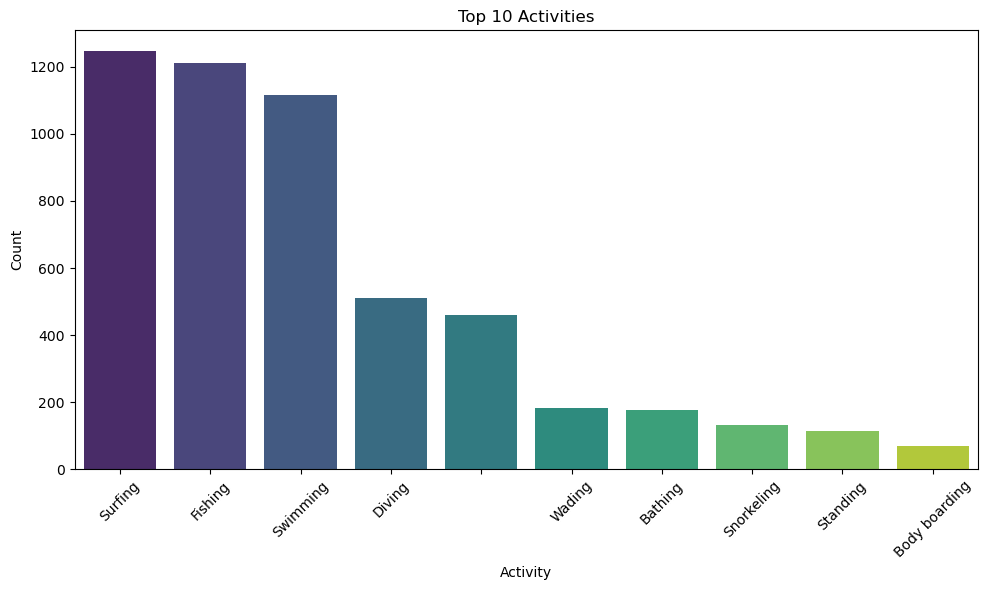

In [261]:
# playing with visual representation
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 10 values in the 'activity' column
top_values = updated_bru_df['activity'].str.capitalize().value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')
plt.title('Top 10 Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Columns we need in the project
- Years
- date (months?)
- activity (can we stand on a beach?)
- country/state/location -> do we need all? let's start with country + location and see how messy it gets from then on?
- age - hospital costs might change
- sex
- unnamed 11 (fatal or not) yes for fatal
- injury (how does that combine with activity type?)
- Jonathan adds column with organs lost

### Formula
probably looks like : who are you, where are you, what are you going to do and when? -> probability calculated through that (will it be fatal or not), and then the result can be checked into the three insurance categories

- location is going to be an important parameter here (another correlation to definitely check, big influential factor?)

- !POINT SYSTEM!

- add point system for column unique values (genius)

### Other parameters to take into account:
- comparison between years to calculate potential drama in upcoming years
- calculate probability based on different parameters
- we're g etting creepy

## Next steps
1. Select columns we will use
2. Inspect column data, see where we have null or empty values
3. Decide what to do with the above
4. 'homogenize' column values
5. Figure out calculations for probability. 